### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nataliawijaya/Documents/Bootcamp/New York Citi Bikes/02 Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'citibike_cleaned_exc2930.csv'), index_col = False)

In [5]:
df

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,start_year,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,days_category
0,0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,2013,9,37,9,2013,9,37,9,18,Weekdays
1,1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,2013,9,37,12,2013,9,37,12,18,Weekdays
2,2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,2013,9,38,18,2013,9,38,18,19,Weekdays
3,3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,2013,9,39,28,2013,9,39,28,12,Weekend
4,4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,2013,9,36,7,2013,9,36,7,18,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46668,49995,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,...,2013,9,38,21,2013,9,38,21,20,Weekend
46669,49996,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,...,2013,9,37,14,2013,9,37,14,17,Weekend
46670,49997,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,...,2013,9,36,7,2013,9,36,7,18,Weekend
46671,49998,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,...,2013,9,36,7,2013,9,36,7,14,Weekend


In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_year,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,days_category
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,2013,9,37,9,2013,9,37,9,18,Weekdays
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,2013,9,37,12,2013,9,37,12,18,Weekdays
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,2013,9,38,18,2013,9,38,18,19,Weekdays
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,2013,9,39,28,2013,9,39,28,12,Weekend
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,2013,9,36,7,2013,9,36,7,18,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46668,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,478,...,2013,9,38,21,2013,9,38,21,20,Weekend
46669,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,...,2013,9,37,14,2013,9,37,14,17,Weekend
46670,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,...,2013,9,36,7,2013,9,36,7,18,Weekend
46671,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,373,...,2013,9,36,7,2013,9,36,7,14,Weekend


In [8]:
df.columns

Index(['bike_id', 'weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'gender_category', 'trip_duration_min', 'start_year', 'start_month',
       'start_week', 'start_day', 'end_year', 'end_month', 'end_week',
       'end_day', 'end_hour', 'days_category'],
      dtype='object')

In [9]:
df['weekday'].value_counts(dropna = False)

weekday
Fri    7309
Wed    7228
Tue    7065
Thu    6857
Sat    6507
Mon    5899
Sun    5808
Name: count, dtype: int64

### Hypothesis

#### 1. The closer to rush hour, the longer the average trip duration
- In the previous heat meap, it shows that the rush hour occurs 2 times: around 8 am and again starts from 4pm and peaks between 5-6pm

#### 2. The more busy days, the longer the average trip duration
- Fri = 7309 rides count
- Wed = 7228 rides count
- Tue = 7065 rides count
- Thu = 6857 rides count
- Sat = 6507 rides count (weekend)
- Mon = 5899 rides count
- Sun = 5808 rides count (weekend)

### Analysis

#### 1. The closer to rush hour, the higher the average trip duration
- x = start_hour
- y = avg_trip_duration_each_hour (need to derive a new column for this)

In [10]:
# At each hour how many rides occurred and the average duration of those rides 

df_hourly_agg = df.groupby('start_hour').agg({
    'start_day': 'count',                    # Count of rides throughout the month of September at any given hour
    'trip_duration_min': 'mean'              # Average trip duration
}).reset_index()

In [11]:
# Rename column names
df_hourly_agg = df_hourly_agg.rename(columns = {'start_day': 'ride_count', 'trip_duration_min': 'avg_trip_duration'})

In [12]:
df_hourly_agg

,start_hour,ride_count,avg_trip_duration
0,0,486,13.055556
1,1,302,13.139073
2,2,167,12.233533
3,3,109,11.596330
4,4,83,11.590361
5,5,191,10.214660
6,6,864,10.479167
7,7,1944,11.795782
8,8,3095,12.458481
9,9,2635,12.319924


In [13]:
df['start_hour'].value_counts(dropna = False)

start_hour
17    4736
18    4546
16    3509
8     3095
19    3084
15    2909
14    2782
13    2753
12    2709
9     2635
11    2093
20    2073
10    2010
7     1944
21    1447
22    1255
23     891
6      864
0      486
1      302
5      191
2      167
3      109
4       83
Name: count, dtype: int64

Peak hours:
- 8am  =  3095 rides count
- 16pm =  3509 rides count
- 17pm =  4736 rides count
- 18pm =  4546 rides count
- 19pm =  3084 rides count

In [14]:
# Deriving new variable
# If-Statements with For-Loops

result = []

for value in df['start_hour']:
    if value in [8, 16, 17, 18, 19]:
        result.append('Peak hours')
    else:
        result.append('Normal hours')

In [15]:
df['peak_hours'] = result
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,37,9,2013,9,37,9,18,Weekdays,Peak hours
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,9,37,12,2013,9,37,12,18,Weekdays,Peak hours
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,9,38,18,2013,9,38,18,19,Weekdays,Peak hours
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,9,39,28,2013,9,39,28,12,Weekend,Normal hours
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,9,36,7,2013,9,36,7,18,Weekend,Peak hours


In [16]:
# At each hour how many rides occurred and the average duration of those rides (between normal and peak hours)

df_peak_agg = df.groupby('peak_hours').agg({
    'start_day': 'count',                    # Count of rides throughout the month of September at any given hour
    'trip_duration_min': 'mean'              # Average trip duration
}).reset_index()

In [17]:
# Rename column names
df_peak_agg = df_peak_agg.rename(columns = {'start_day': 'ride_count', 'trip_duration_min': 'avg_trip_duration'})

In [18]:
df_peak_agg

,peak_hours,ride_count,avg_trip_duration
0,Normal hours,27703,13.255279
1,Peak hours,18970,13.785767


Observation:
- The average trip duration during peak hours is slightly longer than normal hours

/var/folders/kj/ff_yw10j6_zbkk839hkzgftr0000gn/T/ipykernel_51529/4092190223.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['start_hour'], bins = 23)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='start_hour', ylabel='Density'>

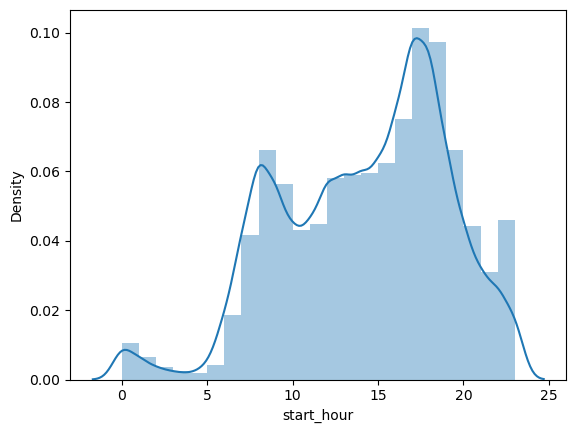

In [19]:
# Extreme value check

sns.distplot(df['start_hour'], bins = 23)

Observation: 
- The values look normal

In [20]:
# Deriving new variable
# Aggregating data with transform()

df['avg_trip_duration_each_hour'] = df.groupby(['start_hour'])['trip_duration_min'].transform(np.mean)

/var/folders/kj/ff_yw10j6_zbkk839hkzgftr0000gn/T/ipykernel_51529/2149989394.py:4: FutureWarning: The provided callable <function mean at 0x1064d4ae0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df['avg_trip_duration_each_hour'] = df.groupby(['start_hour'])['trip_duration_min'].transform(np.mean)


In [21]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,37,9,2013,9,37,9,18,Weekdays,Peak hours,14.086670
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,37,12,2013,9,37,12,18,Weekdays,Peak hours,14.086670
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,38,18,2013,9,38,18,19,Weekdays,Peak hours,13.215953
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,39,28,2013,9,39,28,12,Weekend,Normal hours,13.974200
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,36,7,2013,9,36,7,18,Weekend,Peak hours,14.086670


In [22]:
# Rounding the average of trip duration

df['avg_trip_duration_each_hour'] = df['avg_trip_duration_each_hour'].round(1)

In [23]:
df[['start_hour', 'avg_trip_duration_each_hour']]

,start_hour,avg_trip_duration_each_hour
0,18,14.1
1,18,14.1
2,19,13.2
3,11,14.0
4,18,14.1
...,...,...
46668,18,14.1
46669,17,14.0
46670,18,14.1
46671,13,13.7


In [24]:
df['avg_trip_duration_each_hour'].describe()

count    46673.000000
mean        13.466152
std          0.920047
min         10.200000
25%         12.900000
50%         13.500000
75%         14.100000
max         14.700000
Name: avg_trip_duration_each_hour, dtype: float64

Observation:
- The value min, mean, max look normal

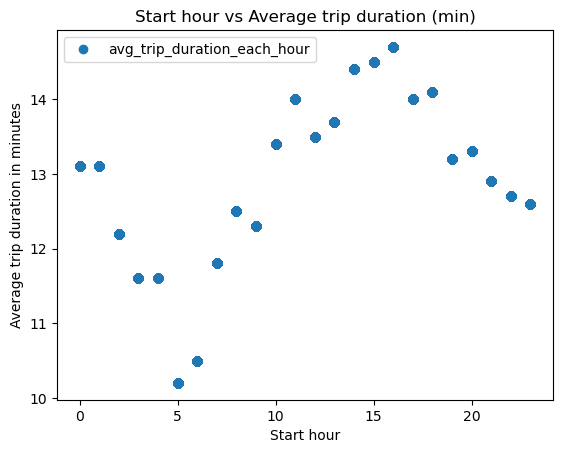

In [25]:
# Data prep for regression analysis
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'start_hour', y = 'avg_trip_duration_each_hour', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Start hour vs Average trip duration (min)')  
plt.xlabel('Start hour')  
plt.ylabel('Average trip duration in minutes')  
plt.show()

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['start_hour'].values.reshape(-1,1)
y = df['avg_trip_duration_each_hour'].values.reshape(-1,1)

In [27]:
X

array([[18],
       [18],
       [19],
       ...,
       [18],
       [13],
       [21]])

In [28]:
y

array([[14.1],
       [14.1],
       [13.2],
       ...,
       [14.1],
       [13.7],
       [12.9]])

In [29]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
# Regression analysis
# Create a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [31]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

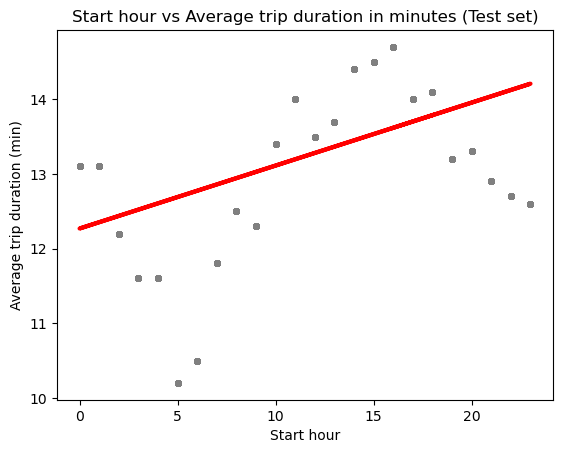

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Test set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08432705]]
Mean squared error:  0.6616992942889148
R2 score:  0.197473283539638


Observation: 
- Slope: The regression has a generally positive slope (as the start time increases (clockwise), the average trip duration will increase as well)
- MSE: Small MSE 
- R2 score: The R2 score for this model is very low

In [36]:
y_predicted

array([[13.78580525],
       [13.61715116],
       [13.36417002],
       ...,
       [13.11118888],
       [13.27984297],
       [13.61715116]])

In [37]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,14.1,13.785805
1,14.7,13.617151
2,13.7,13.364170
3,14.0,13.195516
4,14.7,13.617151
5,13.1,12.267918
6,14.0,13.701478
7,14.0,13.195516
8,14.1,13.785805
9,14.5,13.532824


In [38]:
# Compare how the regression fits the training set
# Predict

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08432705]]
Mean squared error:  0.6866857205572445
R2 score:  0.19760702977367695


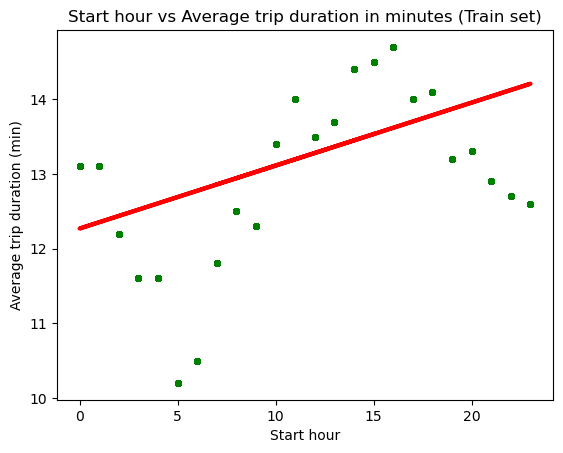

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Train set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

Observation:
- The actual and predicted values appear to be quite off
- The result of Slope, MSE, and R2 from both Test and Train set are almost similar

#### Conclusion:
- This gives evidence to the fact that the model isn’t doing a great job of explaining the relationship between the “Start hour” and “Average trip duration (min)” variables

#### 2. The more busy days, the longer the average trip duration
- x = day_of_week (need to derive a new column for this)
- y = avg_trip_duration_each_hour

In [42]:
# How many rides occured throughout the week and the avg duration of those rides

df_weekly_agg = df.groupby('weekday').agg({
    'start_day': 'count',                    # Count of rides throughout the month of September at any given day
    'trip_duration_min': 'mean'              # Average trip duration
}).reset_index()



In [43]:
# Rename column names
df_weekly_agg = df_weekly_agg.rename(columns = {'start_day': 'ride_count', 'trip_duration_min': 'avg_trip_duration'})

In [44]:
df_weekly_agg

,weekday,ride_count,avg_trip_duration
0,Fri,7309,12.971405
1,Mon,5899,13.279539
2,Sat,6507,15.011526
3,Sun,5808,15.187844
4,Thu,6857,12.632784
5,Tue,7065,12.686766
6,Wed,7228,12.927089


Observation:
- Found a good finding, that although weekends seem to be the least busy compared to weekdays, it can be seen that the average trip duration on weekends is higher compared to weekdays

In [45]:
df['weekday'].value_counts(dropna = False)

weekday
Fri    7309
Wed    7228
Tue    7065
Thu    6857
Sat    6507
Mon    5899
Sun    5808
Name: count, dtype: int64

Derive a new column for 'day_of_week'
- 1 = Sunday
- 2 = Monday
- 3 = Tuesday
- 4 = Wednesday
- 5 = Thursday
- 6 = Friday
- 7 = Saturday

In [46]:
week = []


for value in df['start_day']:
    if value in [1, 8, 15, 22]:
        week.append(1)
    elif value in [2, 9, 16, 23]:
        week.append(2)
    elif value in [3, 10, 17, 24]:
        week.append(3)
    elif value in [4, 11, 18, 25]:
        week.append(4)
    elif value in [5, 12, 19, 26]:
        week.append(5)
    elif value in [6, 13, 20, 27]:
        week.append(6)
    elif value in [7, 14, 21, 28]:
        week.append(7)      
    else:
        week.append('Not defined')

In [47]:
df['day_of_week'] = week

In [48]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7


In [49]:
df['weekday'].value_counts(dropna = False)

weekday
Fri    7309
Wed    7228
Tue    7065
Thu    6857
Sat    6507
Mon    5899
Sun    5808
Name: count, dtype: int64

In [50]:
df['day_of_week'].value_counts(dropna = False)

day_of_week
6    7309
4    7228
3    7065
5    6857
7    6507
2    5899
1    5808
Name: count, dtype: int64

In [51]:
df['days_category'].value_counts(dropna = False)

days_category
Weekdays    34358
Weekend     12315
Name: count, dtype: int64

In [52]:
df_weekly_agg

,weekday,ride_count,avg_trip_duration
0,Fri,7309,12.971405
1,Mon,5899,13.279539
2,Sat,6507,15.011526
3,Sun,5808,15.187844
4,Thu,6857,12.632784
5,Tue,7065,12.686766
6,Wed,7228,12.927089


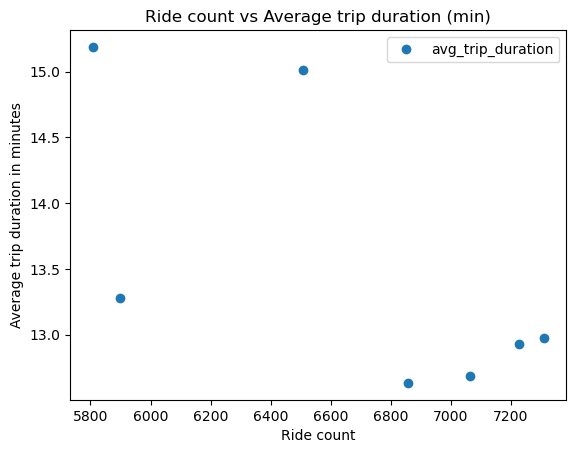

In [53]:
# Data prep for regression analysis
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_weekly_agg.plot(x = 'ride_count', y = 'avg_trip_duration', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Ride count vs Average trip duration (min)')  
plt.xlabel('Ride count')  
plt.ylabel('Average trip duration in minutes')  
plt.show()

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


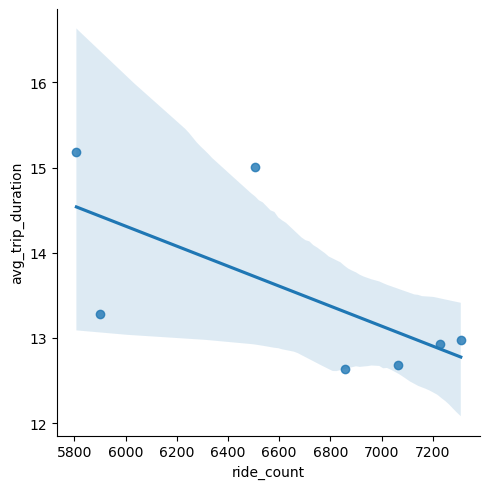

In [54]:
sns.lmplot(x = 'ride_count', y = 'avg_trip_duration', data = df_weekly_agg)

In [55]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_weekly_agg['ride_count'].values.reshape(-1,1)
y = df_weekly_agg['avg_trip_duration'].values.reshape(-1,1)

In [56]:
X

array([[7309],
       [5899],
       [6507],
       [5808],
       [6857],
       [7065],
       [7228]])

In [57]:
y

array([[12.97140512],
       [13.2795389 ],
       [15.01152605],
       [15.18784435],
       [12.63278402],
       [12.68676575],
       [12.9270891 ]])

In [58]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)

In [59]:
# Regression analysis
# Create a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [60]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

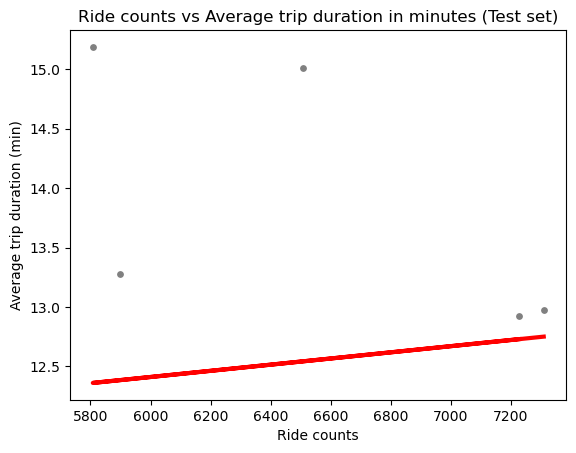

In [62]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Ride counts vs Average trip duration in minutes (Test set)')
plot_test.xlabel('Ride counts')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

In [63]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [64]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00025953]]
Mean squared error:  2.996472537575515
R2 score:  -1.9464748053421204


In [65]:
y_predicted

array([[12.72906874],
       [12.54194937],
       [12.38415662],
       [12.36053962],
       [12.75009047]])

In [66]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12.927089,12.729069
1,15.011526,12.541949
2,13.279539,12.384157
3,15.187844,12.360540
4,12.971405,12.750090


Observation:
- Slope = This regression generally has a positive slope but this is strange because the figures and analysis show that the least busy days (based on the ride count) seem to have longer trip durations, so the results of this slope contradict
- R2 = R2 has negative result
- The actual and predicted values appear to be quite off

#### Conclusion
This model did not perform well on the test set

In [68]:
df

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46668,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,478,...,21,2013,9,38,21,20,Weekend,Peak hours,14.1,7
46669,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,...,14,2013,9,37,14,17,Weekend,Peak hours,14.0,7
46670,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7
46671,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,373,...,7,2013,9,36,7,14,Weekend,Normal hours,13.7,7


### Exporting

In [69]:
df.to_csv(os.path.join(path, 'Prepared Data', 'citibike_cleaned_exc2930_1.csv'))